Sanghun Kim
#48712903

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
np.random.seed(0)

In [37]:
basket = pd.read_csv("C:\\Users\\rtg90\Downloads\\my_basket.csv")
basket.head()

,7up,lasagna,pepsi,yop,red.wine,cheese,bbq,bulmers,mayonnaise,horlics,...,instant.coffee,twix,potatoes,fosters,soup,toad.in.hole,coco.pops,kitkat,broccoli,cigarettes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,2,1,0,0,0,0,0,...,0,2,0,1,0,0,0,1,0,1
4,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1-a

In [38]:
temp = []
for i in range(1,43):
    a = "PC" + str(i)
    temp.append(a)

In [42]:
X = pd.DataFrame(scale(basket), index=basket.index, columns=basket.columns)

In [47]:
pca_loadings = pd.DataFrame(PCA().fit(basket).components_.T, index=basket.columns, columns=temp)
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(basket), columns = temp, index=basket.index)

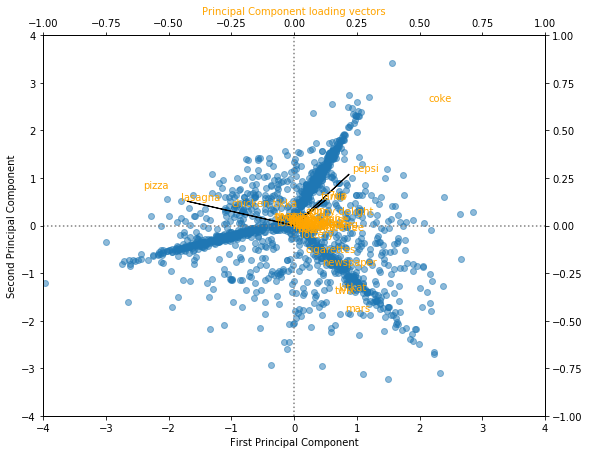

In [62]:
#Not scaled

fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)

#for i in df_plot.index:
#    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
plt.scatter(df_plot.PC1, df_plot.PC2, alpha = 0.5)

    
ax1.hlines(0,-4,4, linestyles='dotted', colors='grey')
ax1.vlines(0,-4,4, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i]*a, -pca_loadings.PC2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], -pca_loadings.PC2[3]);

In [51]:
pca = PCA()
df_plot2 = pd.DataFrame(pca.fit_transform(X), columns = temp, index=X.index)

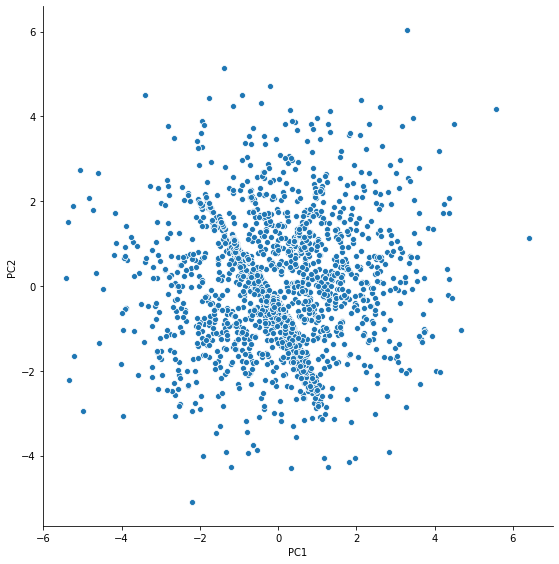

In [80]:
#Scaled
'''
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)

plt.scatter(df_plot2.PC1, df_plot2.PC2, alpha = 0.5)


    
ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
ax1.vlines(0,-5,5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
'''

sns.pairplot(x_vars=['PC1'], y_vars=['PC2'], data=df_plot2, size=8) 



The first plot is not rescaled, and the second plot is rescaled. When the variables are not rescaled, the points are not spread enough; they are all gathered closely together. It seems that rescaling the variables is needed because the data are more evenly spread out when the variables are rescaled. 

# 1-b

In [54]:
pca.explained_variance_[0:2]

array([2.29309689, 2.17307938])

# 1-c

In [66]:
hlabels = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X) 
df_plot2['hier_label'] = hlabels

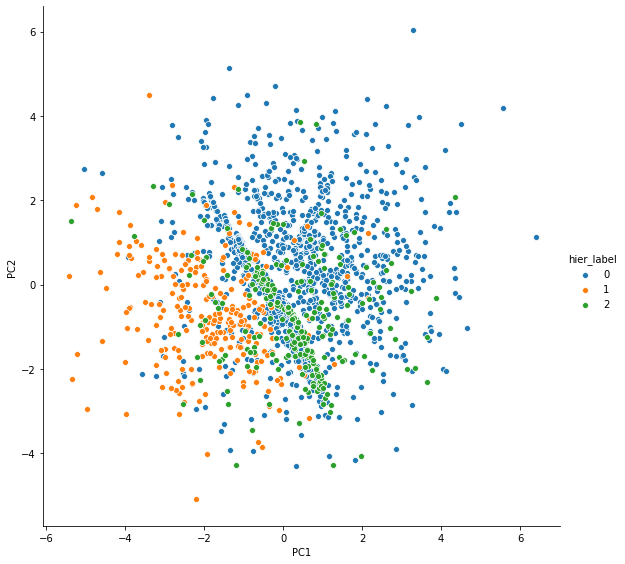

In [88]:
#fig , ax1 = plt.subplots(figsize=(9,7))

#ax1.set_xlim(-5,5)
#ax1.set_ylim(-5,5)

#plt.scatter(df_plot2.PC1, df_plot2.PC2, alpha = 0.5, c = df_plot2['hier_label'])


sns.pairplot(x_vars=['PC1'], y_vars=['PC2'], data=df_plot2, hue="hier_label", size=8) 
    
#ax1.hlines(0,-5,5, linestyles='dotted', colors='grey')
#ax1.vlines(0,-5,5, linestyles='dotted', colors='grey')

#ax1.set_xlabel('First Principal Component')
#ax1.set_ylabel('Second Principal Component')


The clustering in the PCA plot doesn't really look reasonable to me because I don't really see any boundaries. Cluster 1 in orange looks fine, but the cluster 0 and 2 in blue and green, respectively, are mixed together. I can't really see how they are clustered. 

# 1-d

In [85]:
hlabels2 = cluster.AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(X) 
df_plot2['hier_label2'] = hlabels2

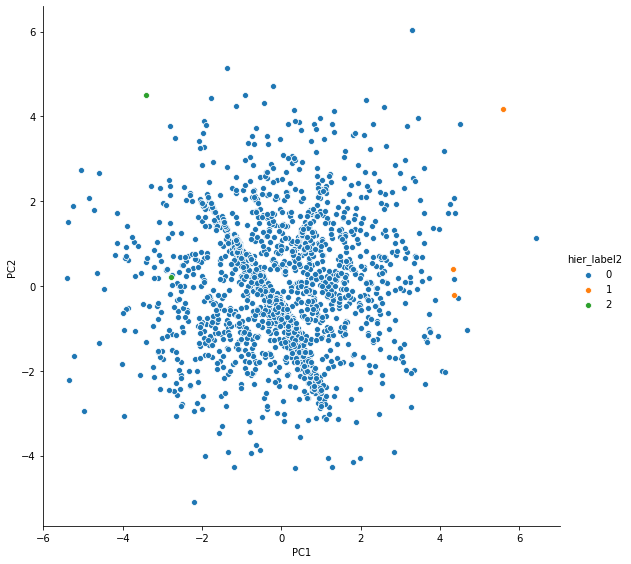

In [87]:
sns.pairplot(x_vars=['PC1'], y_vars=['PC2'], data=df_plot2, hue="hier_label2", height=8) 

This time, I used the complete linkage instead of Ward's linkage. Interestingly, most of the points are clustered as 0. I see very few points (less than 5) from cluster 1 and 2, while the plot from part c had a lot of points from all three clusters. This plot indicates that complete linkage is an inappropriate method for this data. 

# 2-a

In [430]:
features, output = make_classification(n_samples = 60,
                                       n_features = 50,
                                       n_informative = 10,
                                       n_redundant = 0,
                                       n_classes = 3,
                                       shift = None,
                                       class_sep = 43)

In [431]:
temp2 = []
for i in range(1,51):
    a = "Feature" + str(i)
    temp2.append(a)

In [432]:
sample_data = pd.DataFrame(features, columns=temp2)
sample_data['Class'] = output

# 2-b

In [433]:
temp2b = []
for i in range(1,51):
    a = "PC" + str(i)
    temp2b.append(a)

In [434]:
X = pd.DataFrame(scale(sample_data.iloc[:,0:50]), index=sample_data.index, columns=sample_data.columns[0:50])

In [435]:
X.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50
0,-1.035737,0.885080,-0.064587,-1.232999,-0.229240,-0.551897,1.005397,-1.534313,0.325512,1.361890,...,-0.327560,0.663577,-0.743141,-1.937805,0.628338,-1.527224,-0.871093,-0.085016,0.708453,-1.587538
1,1.034905,0.597883,0.366159,0.835088,0.887508,-1.596717,0.942549,2.319150,-0.181311,-0.126220,...,-0.977319,0.854672,-0.700198,-1.557333,0.690340,-1.390232,1.174875,-0.294228,0.735610,0.695831
2,0.968071,0.088317,0.590884,1.409672,0.278702,-0.997872,0.952388,-0.884597,-0.765347,0.128743,...,-2.007812,-0.632637,-0.666367,-0.991145,-0.271801,-0.896849,-0.634533,-0.555286,0.630744,1.693759
3,-0.970627,-0.835741,-1.711898,0.506194,0.278721,-0.079678,-1.040789,-0.365860,-0.809066,1.674765,...,0.125704,0.966542,1.482793,-0.159213,1.031383,-0.376573,1.304298,2.703586,-1.431740,-0.744049
4,-0.992417,-0.402839,0.950026,-1.331006,-0.772393,-1.112535,-0.948116,-1.248927,1.769013,-0.187868,...,1.218521,-0.815258,-0.744220,0.698604,0.651319,-0.718399,-0.430384,-0.003366,-1.398794,-0.276707


In [440]:
#loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=sample_data.iloc[:,0:50].columns, columns=temp2b)

In [436]:
pca2b = PCA()
df_plot2b = pd.DataFrame(pca2b.fit_transform(X), columns=temp2b, index=X.index)
df_plot2b['Class'] = output

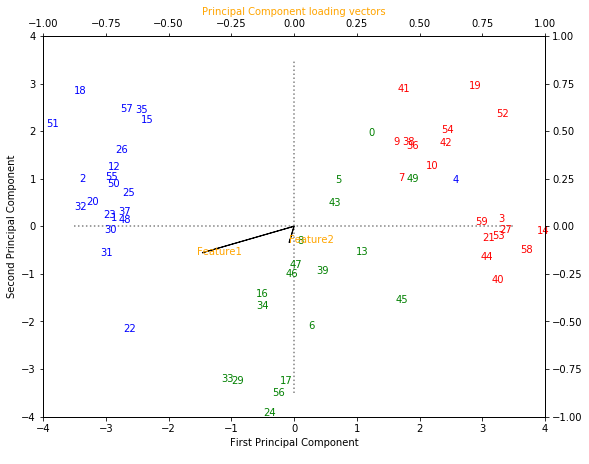

In [443]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)

# Plot Principal Components 1 and 2
for i in df_plot2b.index:
    if df_plot2b.Class.loc[i] == 0:
        ax1.annotate(i, (df_plot2b.PC1.loc[i], -df_plot2b.PC2.loc[i]), ha='center', color = 'red')
    elif df_plot2b.Class.loc[i] == 1:
        ax1.annotate(i, (df_plot2b.PC1.loc[i], -df_plot2b.PC2.loc[i]), ha='center', color = 'blue')
    elif df_plot2b.Class.loc[i] == 2:
        ax1.annotate(i, (df_plot2b.PC1.loc[i], -df_plot2b.PC2.loc[i]), ha='center', color = 'green')

#ax1.legend(df_plot2b.Class)
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')


ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['PC1', 'PC2']].index[0:2]:
    ax2.annotate(i, (pca_loadings.PC1.loc[i]*a, -pca_loadings.PC2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])

# 2-c

In [474]:
sample_data.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50,Class,kmeans_label,kmeans_label_2d,kmeans_label_2e
0,-16.531813,28.795920,-40.089453,-24.908414,-32.357363,-3.402383,40.175527,24.530306,-15.237467,10.993536,...,26.323845,-31.672945,28.759693,-35.065235,58.463567,-1.026226,2,1,0,3
1,73.077762,28.500110,-39.655995,-22.906441,-31.332640,-4.594701,37.487189,28.652742,-15.724791,9.597667,...,26.384443,-31.543094,30.880846,-35.267113,59.562057,1.580462,1,0,1,2
2,70.185464,27.975260,-39.429855,-22.350226,-31.891279,-3.911317,37.908056,25.225373,-16.286355,9.836826,...,25.444074,-31.075430,29.004946,-35.519020,55.320356,2.719694,1,0,1,2
3,-13.714093,27.023487,-41.747136,-23.224821,-31.891261,-2.863501,-47.350308,25.780317,-16.328393,11.287017,...,26.717769,-30.582274,31.015025,-32.374384,-28.104711,-0.063302,0,1,0,1
4,-14.657084,27.469373,-39.068452,-25.003287,-32.855759,-4.042167,-43.386233,24.835612,-13.849505,9.539841,...,26.346305,-30.906282,29.216598,-34.986447,-26.772063,0.470215,1,1,0,1


In [452]:
cols = sample_data.iloc[:,0:50]
kmeans = cluster.KMeans(n_clusters=3)
clabels = kmeans.fit_predict(cols)
sample_data['kmeans_label'] = clabels

In [460]:
#conf_mat = confusion_matrix(sample_data['Class'], sample_data['kmeans_label'])
#acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
#print('Overall accuracy: {} %'.format(acc*100))

In [462]:
adjusted_rand_score(sample_data['Class'], sample_data['kmeans_label'])

0.5808177836149864

The accuracty rate is about 0.581. This is an okay score. I used the adjusted Rand index score to compare the true class labels to the class labels obtained by clustering. 

# 2-d

In [468]:
kmeans_2d = cluster.KMeans(n_clusters=2)
clabels_2d = kmeans_2d.fit_predict(cols)
sample_data['kmeans_label_2d'] = clabels_2d
adjusted_rand_score(sample_data['Class'], sample_data['kmeans_label_2d'])

0.38727577503323635

This time with K=2, the accuracy rate is now 0.387. This is much lower than the accuracy rate of K=3. Score of 0.387 indicates that K=2 doesn't predict the class well. 

# 2-e

In [473]:
kmeans_2e = cluster.KMeans(n_clusters=4)
clabels_2e = kmeans_2e.fit_predict(cols)
sample_data['kmeans_label_2e'] = clabels_2e
adjusted_rand_score(sample_data['Class'], sample_data['kmeans_label_2e'])

0.8115910953186862

For K=4, the accuracy rate is 0.812. The score is better than both K=2 and K=3. It seems that K=4 is a better predictor than K=2 and K=3.

# 2-f

In [479]:
#cols = sample_data.iloc[:,0:50]

kmeans_2f = cluster.KMeans(n_clusters=3)
clabels_2f = kmeans_2f.fit_predict(X.iloc[:,0:2])
sample_data['kmeans_label_2f'] = clabels_2f
adjusted_rand_score(sample_data['Class'], sample_data['kmeans_label_2f'])

0.3088768536536976

For K=3 with the first two principal component score vectors, the score is as low as 0.309. The accuracy rate is very low compared to other results. This is not a good way to predict the class.

# 2-g

In [483]:
new_data = sample_data.iloc[:,0:50]
new_data_norm = new_data.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [484]:
new_data_norm.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature41,Feature42,Feature43,Feature44,Feature45,Feature46,Feature47,Feature48,Feature49,Feature50
count,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,...,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,-2.701543e-16,1.048791e-14,-3.301063e-15,-1.014929e-15,-8.015810e-15,3.608225e-17,1.665335e-17,4.322468e-15,4.442742e-15,1.804112e-16,...,1.580217e-15,-2.297236e-15,-3.219647e-16,-4.637957e-15,1.810589e-15,-4.958996e-15,-2.223222e-15,8.712475e-15,2.183439e-16,-3.215888e-16
std,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,...,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00,1.008439e+00
min,-1.079916e+00,-1.900112e+00,-2.067478e+00,-2.662481e+00,-2.984999e+00,-2.914413e+00,-1.084798e+00,-1.776255e+00,-2.068523e+00,-2.567750e+00,...,-2.117652e+00,-2.674415e+00,-7.830096e-01,-1.937805e+00,-1.728870e+00,-2.558232e+00,-2.262256e+00,-2.179397e+00,-1.483443e+00,-2.167078e+00
25%,-9.922688e-01,-8.423437e-01,-6.698235e-01,-8.135251e-01,-5.645406e-01,-5.541449e-01,-9.972176e-01,-6.934079e-01,-7.703164e-01,-7.570760e-01,...,-6.969854e-01,-5.254796e-01,-7.165318e-01,-7.920478e-01,-9.008800e-01,-6.362729e-01,-7.271238e-01,-6.371624e-01,-1.383198e+00,-5.381610e-01
50%,-7.967488e-04,-1.538720e-02,-5.165857e-02,1.498421e-01,7.802604e-02,2.558255e-01,-1.168881e-02,-5.205764e-02,-2.237898e-03,-1.128827e-01,...,1.199235e-02,-3.813678e-02,-6.896792e-01,-1.721776e-03,3.185087e-02,1.502138e-01,7.933984e-02,-4.419086e-02,6.750699e-01,-2.284648e-02
75%,9.973250e-01,7.655001e-01,6.037136e-01,7.652244e-01,6.261983e-01,7.125753e-01,9.951588e-01,6.193373e-01,6.669635e-01,6.005714e-01,...,7.050092e-01,7.074523e-01,1.394076e+00,7.035061e-01,6.610740e-01,7.524657e-01,6.536013e-01,5.184414e-01,7.288505e-01,6.380059e-01
max,1.050921e+00,2.173386e+00,2.336370e+00,1.940930e+00,2.767126e+00,1.756006e+00,1.091836e+00,2.319150e+00,2.541597e+00,2.134061e+00,...,2.118891e+00,2.224628e+00,1.482793e+00,2.692899e+00,2.352494e+00,1.740798e+00,1.698100e+00,2.703586e+00,8.305661e-01,2.409124e+00


In [485]:
kmeans_2g = cluster.KMeans(n_clusters=3)
clabels_2g = kmeans_2g.fit_predict(new_data_norm)
sample_data['kmeans_label_2g'] = clabels_2g
adjusted_rand_score(sample_data['Class'], sample_data['kmeans_label_2g'])

0.5808177836149864

The accuracy rate is 0.581. It predicts the class correctly for more than half of the data. It is not very low compared to the ones from part d and f. It is a mediocre score.